In [1]:
from alphaengine import stats, loaders
import matplotlib.pyplot as plt

In [2]:
luv = loaders.FileInstrument('../../../Developer/Data/prices/NYSE/LUV.csv')

In [3]:
import talib as ta

In [4]:
ta.RSI(luv['close'], timeperiod=100)

array([        nan,         nan,         nan, ..., 50.25572759,
       50.34067179, 50.26480922])

In [5]:
ta.RSI(luv['close'], timeperiod=10)

array([        nan,         nan,         nan, ..., 44.54698904,
       45.97306576, 44.85166242])

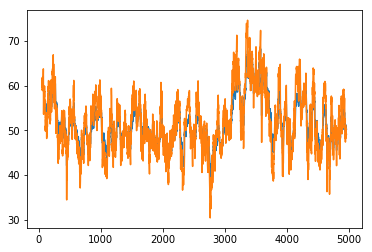

In [6]:
plt.plot(ta.RSI(luv['close'], timeperiod=100))
plt.plot(ta.RSI(luv['close'], timeperiod=50))

In [7]:
luv.attach_feature(ta.RSI(luv['close'], timeperiod=100), 'rsi_100')
luv.attach_feature(ta.RSI(luv['close'], timeperiod=50), 'rsi_50')

In [8]:
mc = stats.monte_carlo(luv, luv['rsi_100'] > luv['rsi_50'])

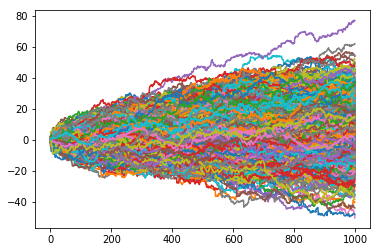

In [9]:
plt.plot(mc.T)

In [10]:
luv.column_names

['day',
 'month',
 'year',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'forward_returns',
 'rsi_100',
 'rsi_50']

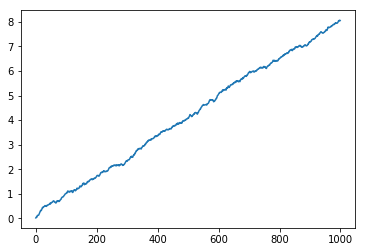

In [11]:
import numpy as np
plt.plot(np.mean(mc, axis=0))

(array([ 2.,  0.,  1.,  1.,  1.,  4.,  2.,  2.,  7.,  6., 10., 13., 15.,
        32., 29., 33., 42., 43., 48., 40., 64., 54., 50., 61., 57., 51.,
        54., 43., 46., 36., 44., 16., 31., 13., 16., 10.,  5.,  9.,  3.,
         1.,  2.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([-50.36  , -47.8092, -45.2584, -42.7076, -40.1568, -37.606 ,
        -35.0552, -32.5044, -29.9536, -27.4028, -24.852 , -22.3012,
        -19.7504, -17.1996, -14.6488, -12.098 ,  -9.5472,  -6.9964,
         -4.4456,  -1.8948,   0.656 ,   3.2068,   5.7576,   8.3084,
         10.8592,  13.41  ,  15.9608,  18.5116,  21.0624,  23.6132,
         26.164 ,  28.7148,  31.2656,  33.8164,  36.3672,  38.918 ,
         41.4688,  44.0196,  46.5704,  49.1212,  51.672 ,  54.2228,
         56.7736,  59.3244,  61.8752,  64.426 ,  66.9768,  69.5276,
         72.0784,  74.6292,  77.18  ]),
 <a list of 50 Patch objects>)

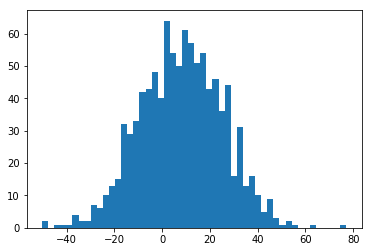

In [12]:
plt.hist(mc[:,-1], bins=50)

In [13]:
bh = stats.monte_carlo(luv, np.ones(len(luv['close'])).astype(bool))

(array([ 2.,  0.,  1.,  1.,  1.,  4.,  2.,  2.,  7.,  6., 10., 13., 15.,
        32., 29., 33., 42., 43., 48., 40., 64., 54., 50., 61., 57., 51.,
        54., 43., 46., 36., 44., 16., 31., 13., 16., 10.,  5.,  9.,  3.,
         1.,  2.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([-50.36  , -47.8092, -45.2584, -42.7076, -40.1568, -37.606 ,
        -35.0552, -32.5044, -29.9536, -27.4028, -24.852 , -22.3012,
        -19.7504, -17.1996, -14.6488, -12.098 ,  -9.5472,  -6.9964,
         -4.4456,  -1.8948,   0.656 ,   3.2068,   5.7576,   8.3084,
         10.8592,  13.41  ,  15.9608,  18.5116,  21.0624,  23.6132,
         26.164 ,  28.7148,  31.2656,  33.8164,  36.3672,  38.918 ,
         41.4688,  44.0196,  46.5704,  49.1212,  51.672 ,  54.2228,
         56.7736,  59.3244,  61.8752,  64.426 ,  66.9768,  69.5276,
         72.0784,  74.6292,  77.18  ]),
 <a list of 50 Patch objects>)

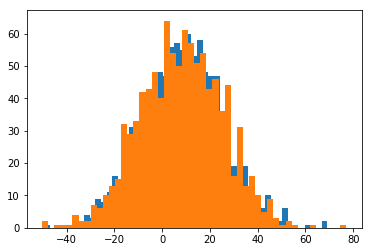

In [14]:
plt.hist(bh[:,-1], bins=50)
plt.hist(mc[:,-1], bins=50)

In [15]:
from statsmodels.stats.weightstats import ttest_ind

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [16]:
ttest_ind(mc[:,-1], bh[:,-1], alternative='larger')

(-1.0974209690185306, 0.863705174849331, 1998.0)

In [26]:
def calculate_p_score(asset, strategy, bh, samples=1000, simulations=1000):
    mc = stats.monte_carlo(asset, strategy, samples=samples, simulations=simulations)
    
    _, p, _ = ttest_ind(mc[:,-1], bh[:,-1], alternative='larger')
    return p

In [24]:
# calculate_p_score(luv, luv['rsi_100'] > luv['rsi_50'])

TypeError: calculate_p_score() missing 1 required positional argument: 'bh'

In [31]:
good_strats = []
bh_strat = np.ones(len(luv['close'])).astype(bool)
bh = stats.monte_carlo(luv, bh_strat, samples=1000, simulations=1000)

for i in range(100):
    print(i)
    rsi = ta.RSI(luv['close'], timeperiod=5+i)
    p = calculate_p_score(asset=luv, strategy=rsi > 60, bh=bh)
    if p < 0.001:
        good_strats.append(rsi > 60)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [20]:
good_strats

[array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..

KeyboardInterrupt: 

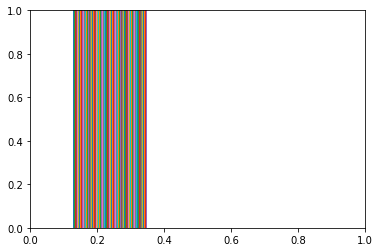

In [21]:
plt.hist(bh, bins=50)
plt.hist(mc, bins=50)

In [72]:
eurusd = loaders.FileInstrument('../../../Developer/Data/prices/FOREX/EURUSD.csv')

In [73]:
good_strats = []

for i in range(100):
    print(i)
    rsi = ta.RSI(eurusd['close'], timeperiod=5+i)
    p = calculate_p_score(eurusd, rsi > 60)
    if p < 0.001:
        good_strats.append(rsi > 60)

0
1
2


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


3
4
5
6


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [74]:
good_strats

[array([False, False, False, ...,  True,  True,  True]),
 array([False, False, False, ...,  True,  True,  True]),
 array([False, False, False, ...,  True,  True,  True]),
 array([False, False, False, ...,  True,  True,  True]),
 array([False, False, False, ...,  True,  True,  True]),
 array([False, False, False, ...,  True,  True,  True]),
 array([False, False, False, ...,  True,  True,  True]),
 array([False, False, False, ...,  True,  True,  True]),
 array([False, False, False, ...,  True,  True,  True]),
 array([False, False, False, ...,  True,  True,  True]),
 array([False, False, False, ...,  True,  True,  True]),
 array([False, False, False, ...,  True,  True,  True]),
 array([False, False, False, ...,  True,  True,  True]),
 array([False, False, False, ...,  True,  True,  True]),
 array([False, False, False, ...,  True,  True,  True]),
 array([False, False, False, ...,  True,  True,  True]),
 array([False, False, False, ...,  True,  True,  True]),
 array([False, False, False, ..

In [141]:
bh = stats.monte_carlo(eurusd, np.ones(len(eurusd['close'])).astype(bool))
mc = stats.monte_carlo(eurusd, good_strats[31])

(array([ 1.,  0.,  0.,  1.,  0.,  6.,  2.,  4.,  2.,  5.,  7.,  6.,  9.,
         9., 17., 22., 25., 26., 32., 37., 36., 47., 50., 43., 46., 50.,
        60., 43., 46., 54., 40., 30., 51., 38., 39., 20., 16., 21., 13.,
        11.,  8.,  5.,  4.,  8.,  1.,  4.,  0.,  3.,  1.,  1.]),
 array([-4.32200e-01, -4.05174e-01, -3.78148e-01, -3.51122e-01,
        -3.24096e-01, -2.97070e-01, -2.70044e-01, -2.43018e-01,
        -2.15992e-01, -1.88966e-01, -1.61940e-01, -1.34914e-01,
        -1.07888e-01, -8.08620e-02, -5.38360e-02, -2.68100e-02,
         2.16000e-04,  2.72420e-02,  5.42680e-02,  8.12940e-02,
         1.08320e-01,  1.35346e-01,  1.62372e-01,  1.89398e-01,
         2.16424e-01,  2.43450e-01,  2.70476e-01,  2.97502e-01,
         3.24528e-01,  3.51554e-01,  3.78580e-01,  4.05606e-01,
         4.32632e-01,  4.59658e-01,  4.86684e-01,  5.13710e-01,
         5.40736e-01,  5.67762e-01,  5.94788e-01,  6.21814e-01,
         6.48840e-01,  6.75866e-01,  7.02892e-01,  7.29918e-01,
         7.5

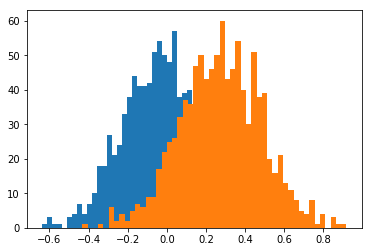

In [142]:
plt.hist(bh[:,-1], bins=50)
plt.hist(mc[:,-1], bins=50)

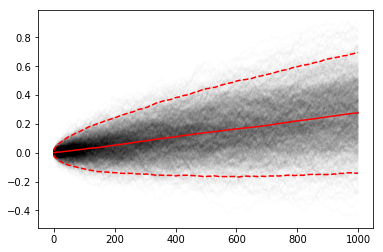

In [154]:
upper, lower = stats.confidence_bands(mc)

plt.plot(mc.T, color='k', alpha=0.01)
plt.plot(np.mean(mc, axis=0), color='r')
plt.plot(upper, color='r', linestyle='dashed')
plt.plot(lower, color='r', linestyle='dashed')

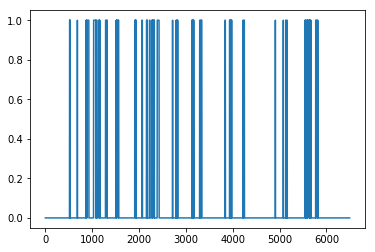

In [159]:
plt.plot(good_strats[31])